In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the data
train_data = pd.read_csv("diabetes_train_data.csv")
test_data = pd.read_csv("diabetes_test_data.csv")

# Display basic information and first few rows of the training dataset
train_data_info = train_data.info()
train_data_head = train_data.head()

# Display basic information and first few rows of the test dataset
test_data_info = test_data.info()
test_data_head = test_data.head()

train_data_info, train_data_head, test_data_info, test_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
 8   Outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies          

(None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            2       84              0              0        0   0.0   
 1            9      112             82             24        0  28.2   
 2            1      139             46             19       83  28.7   
 3            0      161             50              0        0  21.9   
 4            6      134             80             37      370  46.2   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                     0.304   21        0  
 1                     1.282   50        1  
 2                     0.654   22        0  
 3                     0.254   65        0  
 4                     0.238   46        1  ,
 None,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0            6       98             58             33      190  34.0   
 1            2      112             75             32        0  35.7   
 2            2      108             64              0  

In [7]:
# Assuming the label column is named 'Outcome'
X_train = train_data.drop(columns='Outcome')
y_train = train_data['Outcome']
X_test = test_data.drop(columns='Outcome')
y_test = test_data['Outcome']


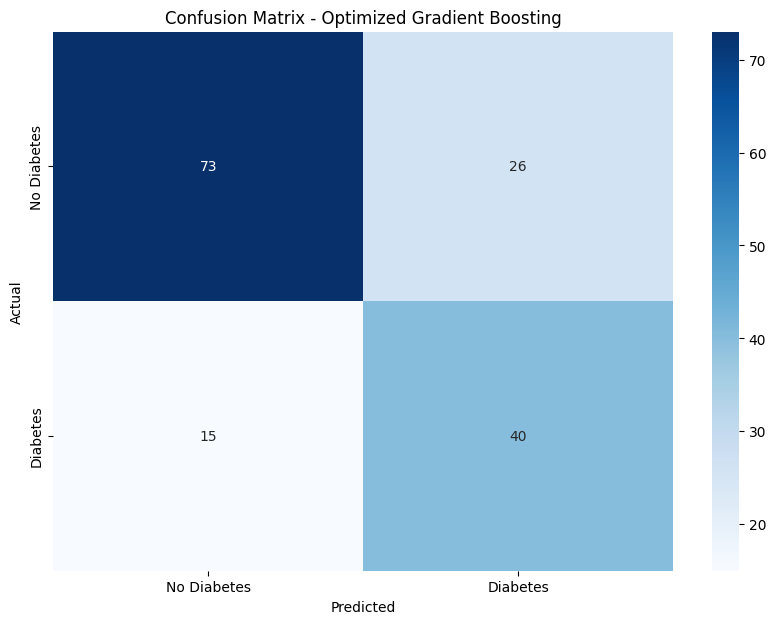

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_

# Predict on the test data
y_pred_best = best_gb_model.predict(X_test)

# Evaluate the optimized model
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix for the optimized model
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optimized Gradient Boosting')
plt.show()




In [9]:
y_pred_best

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [10]:
accuracy_best

0.7337662337662337

In [11]:
report_best

'              precision    recall  f1-score   support\n\n           0       0.83      0.74      0.78        99\n           1       0.61      0.73      0.66        55\n\n    accuracy                           0.73       154\n   macro avg       0.72      0.73      0.72       154\nweighted avg       0.75      0.73      0.74       154\n'